In [34]:
import pandas as pd
df=pd.read_csv("owid-covid-data.csv")


In [71]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati;
df.shape


(387330, 67)

In [31]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [37]:
continenti=df.continent.unique()
continenti

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [38]:
print(f"il data frame è compostoda {df.shape[0]} righe e da {df.shape[1]}colonne")

il data frame è compostoda 387330 righe e da 67colonne


In [41]:
# Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
# si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

casi_per_continente = df.groupby("continent")["new_cases"].sum().astype(int)
print("Numero di casi per continente:")
print(casi_per_continente)

Numero di casi per continente:
continent
Africa            13141282
Asia             301446461
Europe           252376812
North America    124530643
Oceania           14808170
South America     68718448
Name: new_cases, dtype: int32


In [122]:
# Sempre riguardo i casi totali, si chiede di scrivere del codice che,
# date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici:
# valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo
# (calcolati anche sulle locazioni senza indicazione di continente);

In [121]:
continenti1=df[df["continent"].isin(["Europ","Asia","Oceania"])]
continenti1.continent.unique()

array(['Asia', 'Oceania'], dtype=object)

In [45]:
continenti2=df[df["continent"].isin(["North America","South America","Africa"])]
continenti2.continent.unique()

array(['Africa', 'North America', 'South America'], dtype=object)

In [110]:
# Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.
# Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
# Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
# e commentare se ci sono similarità con l'andamento del numero dei casi totali;


In [123]:
df["date"]= pd.to_datetime(df["date"])
italy = df[(df.location == 'Italy') & (df['date'].dt.year == 2022)]
italy.head(1)

iso_code continent location       date  total_cases  new_cases  \
166403      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
166403             36797.0      136530.0         0.0              140.857   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
166403  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
166403            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
166403                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
166403               NaN                                      NaN  

[1 rows x 67 columns]

In [120]:
import numpy as np
italy.new_cases.replace(0, np.nan, inplace=True)

In [117]:
italy = italy.dropna(subset=["new_cases"])
italy.head(1)

iso_code continent location       date  total_cases  new_cases  \
166404      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
166404           92086.286      137513.0       983.0              140.429   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
166404  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
166404            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
166404                              168226.3                        12.99   

        excess_mortality  excess_mortality_cumulative_per_million  
166404              8.06                                2849.4834  

[1 rows x 67 columns]

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

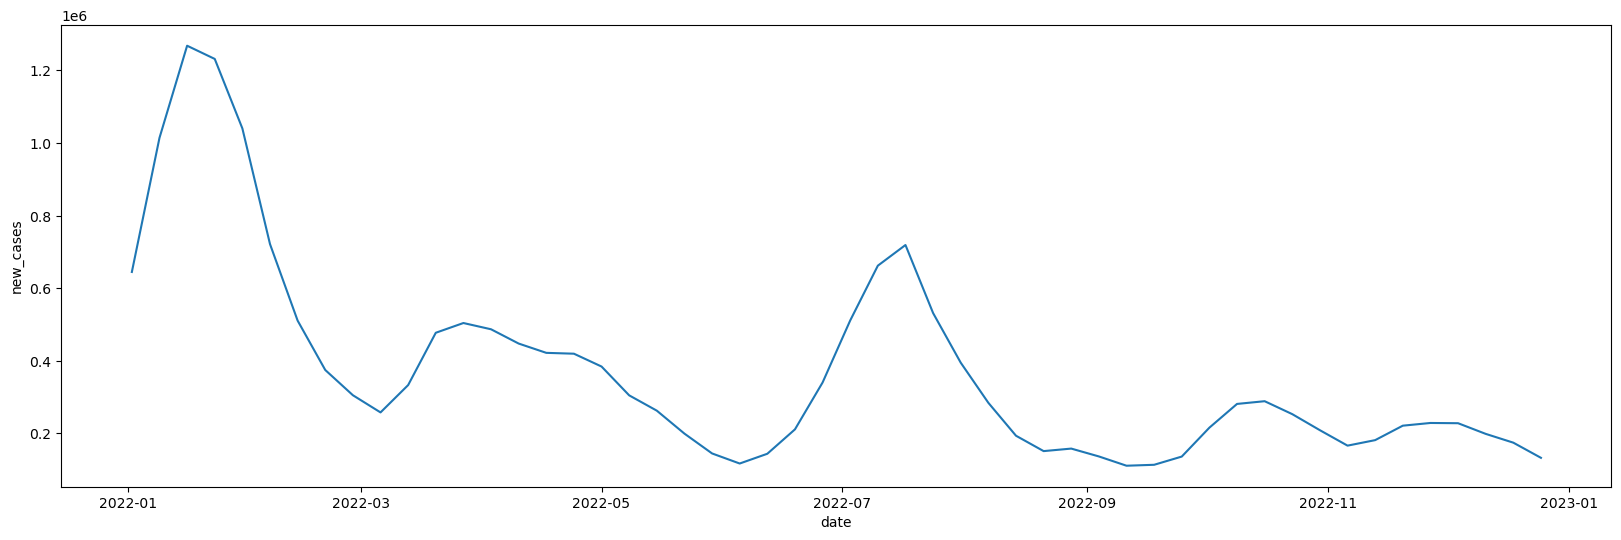

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.lineplot(data=italy, x="date", y="new_cases") 

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

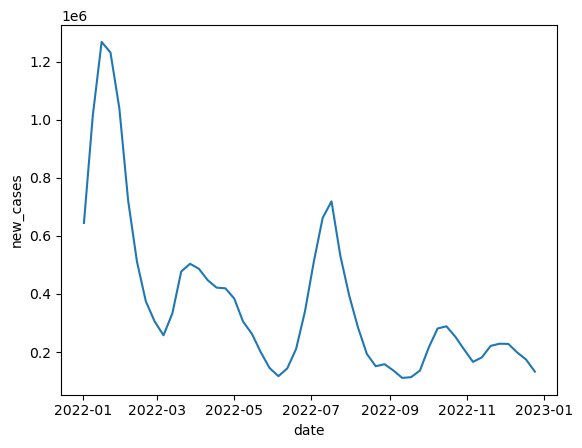

In [119]:
sns.lineplot(data=italy, x="date", y="new_cases") 

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

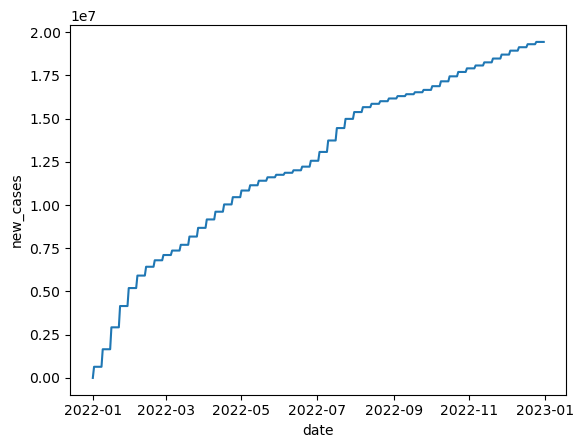

In [124]:
italy_somma = italy['new_cases'].cumsum()
sns.lineplot(data=italy, x='date', y=italy_somma)

In [ ]:
Il grafico dei nuovi casi e simile a quello dei casi totali.

In [ ]:
# Riguardo le nazioni di Italia, Germania e Francia, 
# mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva
# (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

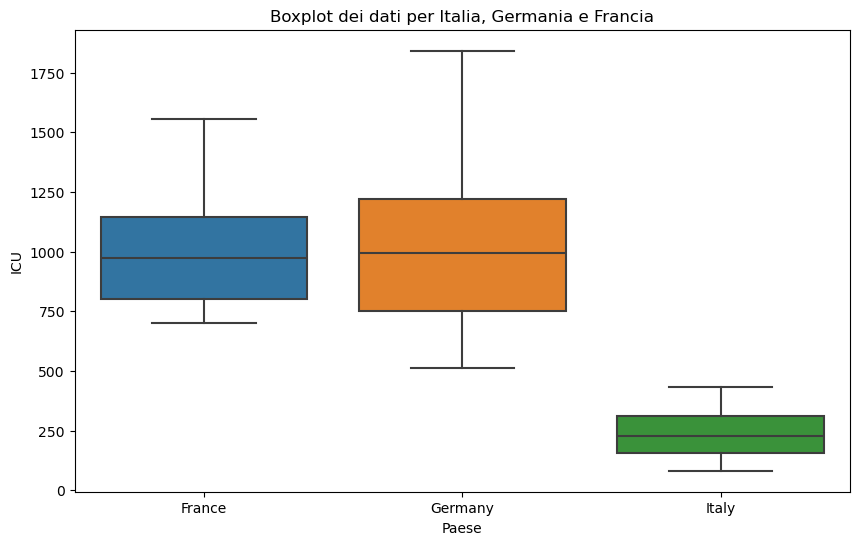

In [134]:
italia_germania_francia = df[df['location'].isin(['Italy', 'Germany', 'France'])]
italia_germania_francia = italia_germania_francia[(italia_germania_francia['date'] >= '2022-05-01') & (italia_germania_francia['date'] <= '2023-04-30')]
italia_germania_francia
plt.figure(figsize=(10, 6))  
sns.boxplot(data=italia_germania_francia, x='location', y='icu_patients')  
plt.title('Boxplot dei dati per Italia, Germania e Francia')
plt.xlabel('Paese')
plt.ylabel('ICU')  
plt.show()

In [ ]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna
# — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [153]:
italia_germania_francia_spagna_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]
somma_ospitalizzati_per_nazione = italia_germania_francia_spagna_2023.groupby('location')['hosp_patients'].sum()
somma_ospitalizzati_per_nazione

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [154]:
italia_germania_francia_spagna_2023[italia_germania_francia_spagna_2023.location=="Germany"]["weekly_hosp_admissions"]

126855    10305.0
126856    10253.0
126857    12626.0
126858    11214.0
126859    10502.0
           ...   
127215        NaN
127216        NaN
127217        NaN
127218        NaN
127219        NaN
Name: weekly_hosp_admissions, Length: 365, dtype: float64

In [156]:
italia_germania_francia_spagna_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]
somma_ospitalizzati_settimanalmente_per_nazione = italia_germania_francia_spagna_2023.groupby('location')['weekly_hosp_admissions'].sum()
somma_ospitalizzati_settimanalmente_per_nazione

location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64

In [ ]:
Dato che nel periodo richiesto non ci sono valori negli ospitalizzati, si prende in considerazione i pazienti ammessi settimanalmente.